### EDA mortalidad

Exploración de datos de 'sonora_municipio_tidy_melt_mortalidad_menor1.csv', este dataset contiene las defunciones de menores de 1 año para cada uno de los municipios de Sonora, del 1994-2020

In [4]:
import pandas as pd
import plotly.express as px
import missingno as msno
import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np



In [2]:
mortalidad_data = pd.read_csv('/home/carlosv/gobierno/data_sonora_buqui/data/processed/sonora_municipio_tidy_melt_mortalidad_menor1.csv')
mortalidad_data.head()

,index,cve_municipio,municipio,año,Defunciones
0,17,18,Cajeme,1994,108.0
1,28,29,Guaymas,1994,54.0
2,29,30,Hermosillo,1994,278.0
3,41,42,Navojoa,1994,70.0
4,42,43,Nogales,1994,97.0


In [3]:
#Eliminamos columnas no necesarias
mortalidad_data.drop(['index', 'cve_municipio'], axis=1, inplace=True)

In [4]:
#Observamos los tipos de datos de las columnas restantes
mortalidad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   municipio    135 non-null    object 
 1   año          135 non-null    int64  
 2   Defunciones  135 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [69]:
#Graficando Serie de tiempo para cada uno de los municipios
fig = px.line(mortalidad_data, x="año", y='Defunciones',color='municipio',
              title='Defunciones de menores de 1 año en los principales municipios de Sonora',
              labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')

fig.show()

In [6]:
dff = mortalidad_data.groupby('año')['Defunciones'].sum()
dff.head()

año
1994    607.0
1995    512.0
1996    538.0
1997    522.0
1998    511.0
Name: Defunciones, dtype: float64

In [7]:
fig = px.bar(dff, x=dff.index, y=dff.values, 
             labels={'y': 'Defunciones',
                     'año':'Año'},
             title='Defunciones de menores de 1 año reportadas en los principales municipios de Sonora',
             template='ggplot2')
fig.show()

In [8]:
fig = px.bar(mortalidad_data, x="año", y='Defunciones',color='municipio',
              title='Defunciones de menores de 1 año en los principales municipios de Hermosillo',
              labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')

fig.show()

In [15]:
dff = mortalidad_data[mortalidad_data['municipio'] == 'Hermosillo']
fig = px.scatter(dff, x="año", y="Defunciones", trendline="ols",
                title='Defunciones de menores de 1 año en Hermosillo',
                labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')
fig.show()

In [17]:
#Calculando trendline para cada uno de los municipios
dff = mortalidad_data[mortalidad_data['municipio'] == 'Hermosillo']
X = dff[['año']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = dff['Defunciones']


In [18]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            Defunciones   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     44.46
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           5.49e-07
Time:                        09:41:47   Log-Likelihood:                -130.13
No. Observations:                  27   AIC:                             264.3
Df Residuals:                      25   BIC:                             266.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.05e+04   1545.032      6.794      0.0

In [21]:
model.params[1]

-5.133089133089127

In [28]:
tendencias = pd.DataFrame()
#Obteniendo la tendencia para cada municipio
for municipio in mortalidad_data['municipio'].unique():
    dff = mortalidad_data[mortalidad_data['municipio'] == municipio]
    X = dff[['año']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
    Y = dff['Defunciones']
    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X) 

    df = pd.DataFrame({"municipio":[municipio],
                    "tendencia":[model.params[1]]})
    tendencias = pd.concat([tendencias, df])

In [29]:
tendencias

,municipio,tendencia
0,Cajeme,-1.923077
0,Guaymas,-0.826618
0,Hermosillo,-5.133089
0,Navojoa,-1.273504
0,Nogales,-2.675824


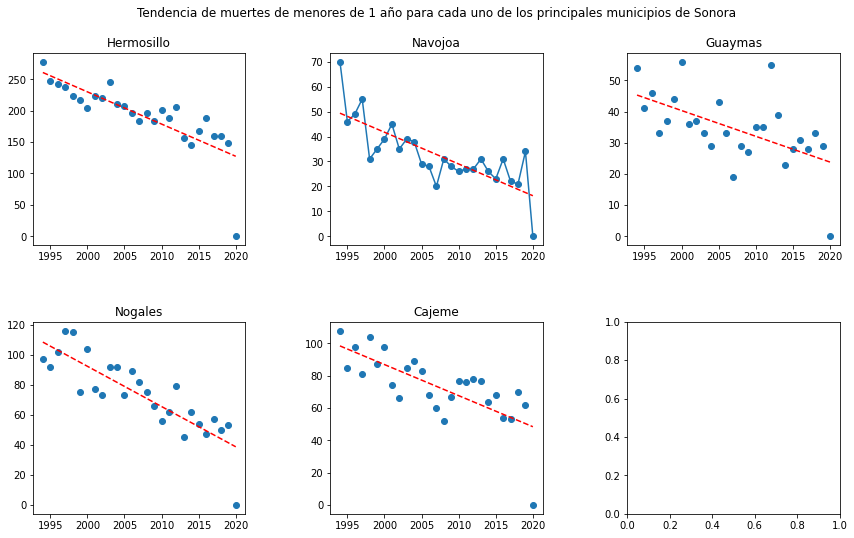

In [68]:
dff = mortalidad_data[mortalidad_data['municipio'] == 'Hermosillo']
fig, ax = plt.subplots(2, 3, figsize=(14,8))
plt.subplot(2, 3, 1)

ax[0, 0].scatter(dff.año, dff.Defunciones)
z = np.polyfit(dff.año, dff.Defunciones, 1)
p = np.poly1d(z)
plt.title('Hermosillo')
ax[0, 0].plot(dff.año,p(dff.año),"r--")

dff = mortalidad_data[mortalidad_data['municipio'] == 'Navojoa']
plt.subplot(2, 3, 2)
plt.scatter(dff.año, dff.Defunciones)
plt.plot(dff.año, dff.Defunciones)
z = np.polyfit(dff.año, dff.Defunciones, 1)
p = np.poly1d(z)
plt.title('Navojoa')
plt.plot(dff.año,p(dff.año),"r--")

dff = mortalidad_data[mortalidad_data['municipio'] == 'Guaymas']
plt.subplot(2, 3, 3)
plt.scatter(dff.año, dff.Defunciones)
z = np.polyfit(dff.año, dff.Defunciones, 1)
p = np.poly1d(z)
plt.title('Guaymas')
plt.plot(dff.año,p(dff.año),"r--")

dff = mortalidad_data[mortalidad_data['municipio'] == 'Nogales']
plt.subplot(2, 3, 4)
plt.scatter(dff.año, dff.Defunciones)
z = np.polyfit(dff.año, dff.Defunciones, 1)
p = np.poly1d(z)
plt.title('Nogales')
plt.plot(dff.año,p(dff.año),"r--")

dff = mortalidad_data[mortalidad_data['municipio'] == 'Cajeme']
plt.subplot(2, 3, 5)
plt.scatter(dff.año, dff.Defunciones)
z = np.polyfit(dff.año, dff.Defunciones, 1)
p = np.poly1d(z)
plt.title('Cajeme')
plt.plot(dff.año,p(dff.año),"r--")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Tendencia de muertes de menores de 1 año para cada uno de los principales municipios de Sonora')
plt.show()

# Mortalidad por Municipio

Carga de datos

In [26]:
mortalidad_data = pd.read_csv('../data/processed/sonora_municipio_tidy_mortalidad_menores1_tidy.csv')
mortalidad_data.head()

,cve_municipio,desc_municipio,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Aconchi,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,3.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
1,2,Agua Prieta,32.0,29.0,35.0,32.0,37.0,28.0,48.0,49.0,...,21.0,26.0,29.0,27.0,17.0,28.0,15.0,19.0,14.0,0.0
2,3,Alamos,13.0,11.0,8.0,12.0,2.0,8.0,8.0,11.0,...,5.0,2.0,3.0,4.0,6.0,2.0,3.0,3.0,3.0,0.0
3,4,Altar,2.0,1.0,4.0,1.0,3.0,5.0,4.0,3.0,...,0.0,2.0,7.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0
4,5,Arivechi,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
#Eliminar codigo minicipio
mortalidad_data.drop(['cve_municipio'], axis=1, inplace=True)

<AxesSubplot:>

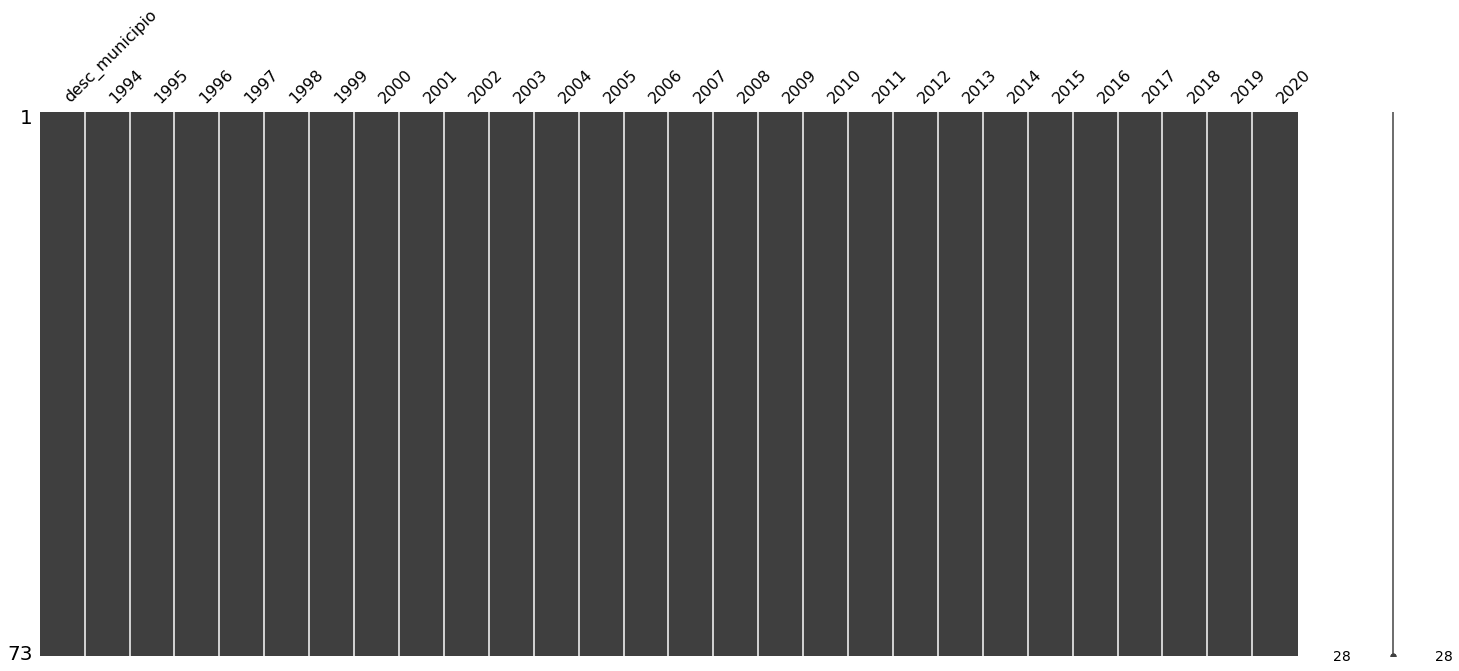

In [28]:
msno.matrix(mortalidad_data)

In [29]:
#Renombrando columnas
mortalidad_data.rename({'desc_municipio':'municipio'}, axis=1, inplace=True)

In [30]:
mortalidad_tidy = pd.melt(mortalidad_data, id_vars='municipio', value_vars =list(mortalidad_data.iloc[:,1:].columns),var_name='año', value_name='defuncion')
mortalidad_tidy

,municipio,año,defuncion
0,Aconchi,1994,1.0
1,Agua Prieta,1994,32.0
2,Alamos,1994,13.0
3,Altar,1994,2.0
4,Arivechi,1994,0.0
...,...,...,...
1966,Yécora,2020,0.0
1967,General Plutarco Elías Calles,2020,0.0
1968,Benito Juárez,2020,0.0
1969,San Ignacio Río Muerto,2020,0.0


In [31]:
mortalidad_tidy['año'] = mortalidad_tidy['año'].astype('int64') 

In [32]:
#Graficando Serie de tiempo para cada uno de los municipios
fig = px.line(mortalidad_tidy, x="año", y='defuncion',color='municipio',
              title='Defunciones en los municipios de Sonora',
              labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')

fig.show()

In [33]:
dff = mortalidad_tidy.groupby('año')['defuncion'].sum()
fig = px.bar(dff, x=dff.index, y=dff.values, 
             labels={'y': 'Defunciones',
                     'año':'Año'},
             title='Defunciones totales en Sonora',
             template='ggplot2')
fig.show()


In [34]:
fig = px.bar(mortalidad_tidy, x="año", y='defuncion',color='municipio',
              title='Defunciones en los municipios de Hermosillo',
              labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')

fig.show()

In [35]:
dff = mortalidad_tidy[mortalidad_tidy['municipio'] == 'Hermosillo']
fig = px.scatter(dff, x="año", y="defuncion", trendline="ols",
                title='Defunciones en Hermosillo',
                labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')
fig.show()

In [36]:
tendencias = pd.DataFrame()
#Obteniendo la tendencia para cada municipio
for municipio in mortalidad_tidy['municipio'].unique():
    dff = mortalidad_tidy[mortalidad_tidy['municipio'] == municipio]
    X = dff[['año']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
    Y = dff['defuncion']
    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X) 

    df = pd.DataFrame({"municipio":[municipio],
                    "tendencia":[model.params[1]]})
    tendencias = pd.concat([tendencias, df])

In [37]:
tendencias

,municipio,tendencia
0,Aconchi,0.015263
0,Agua Prieta,-0.925519
0,Alamos,-0.312576
0,Altar,-0.074481
0,Arivechi,0.004884
...,...,...
0,Yécora,-0.064713
0,General Plutarco Elías Calles,-0.131258
0,Benito Juárez,-0.064713
0,San Ignacio Río Muerto,0.050672


In [17]:
dff = mortalidad_tidy[mortalidad_tidy['municipio'] == 'Benito Juárez']
fig = px.scatter(dff, x="año", y="defuncion", trendline="ols",
                title='Defunciones en Benito Juarez',
                labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')
fig.show()

In [39]:
municipos = mortalidad_data['municipio'].unique()
count = len(municipos)


In [38]:
mortalidad_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   municipio  1971 non-null   object 
 1   año        1971 non-null   int64  
 2   defuncion  1971 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 46.3+ KB


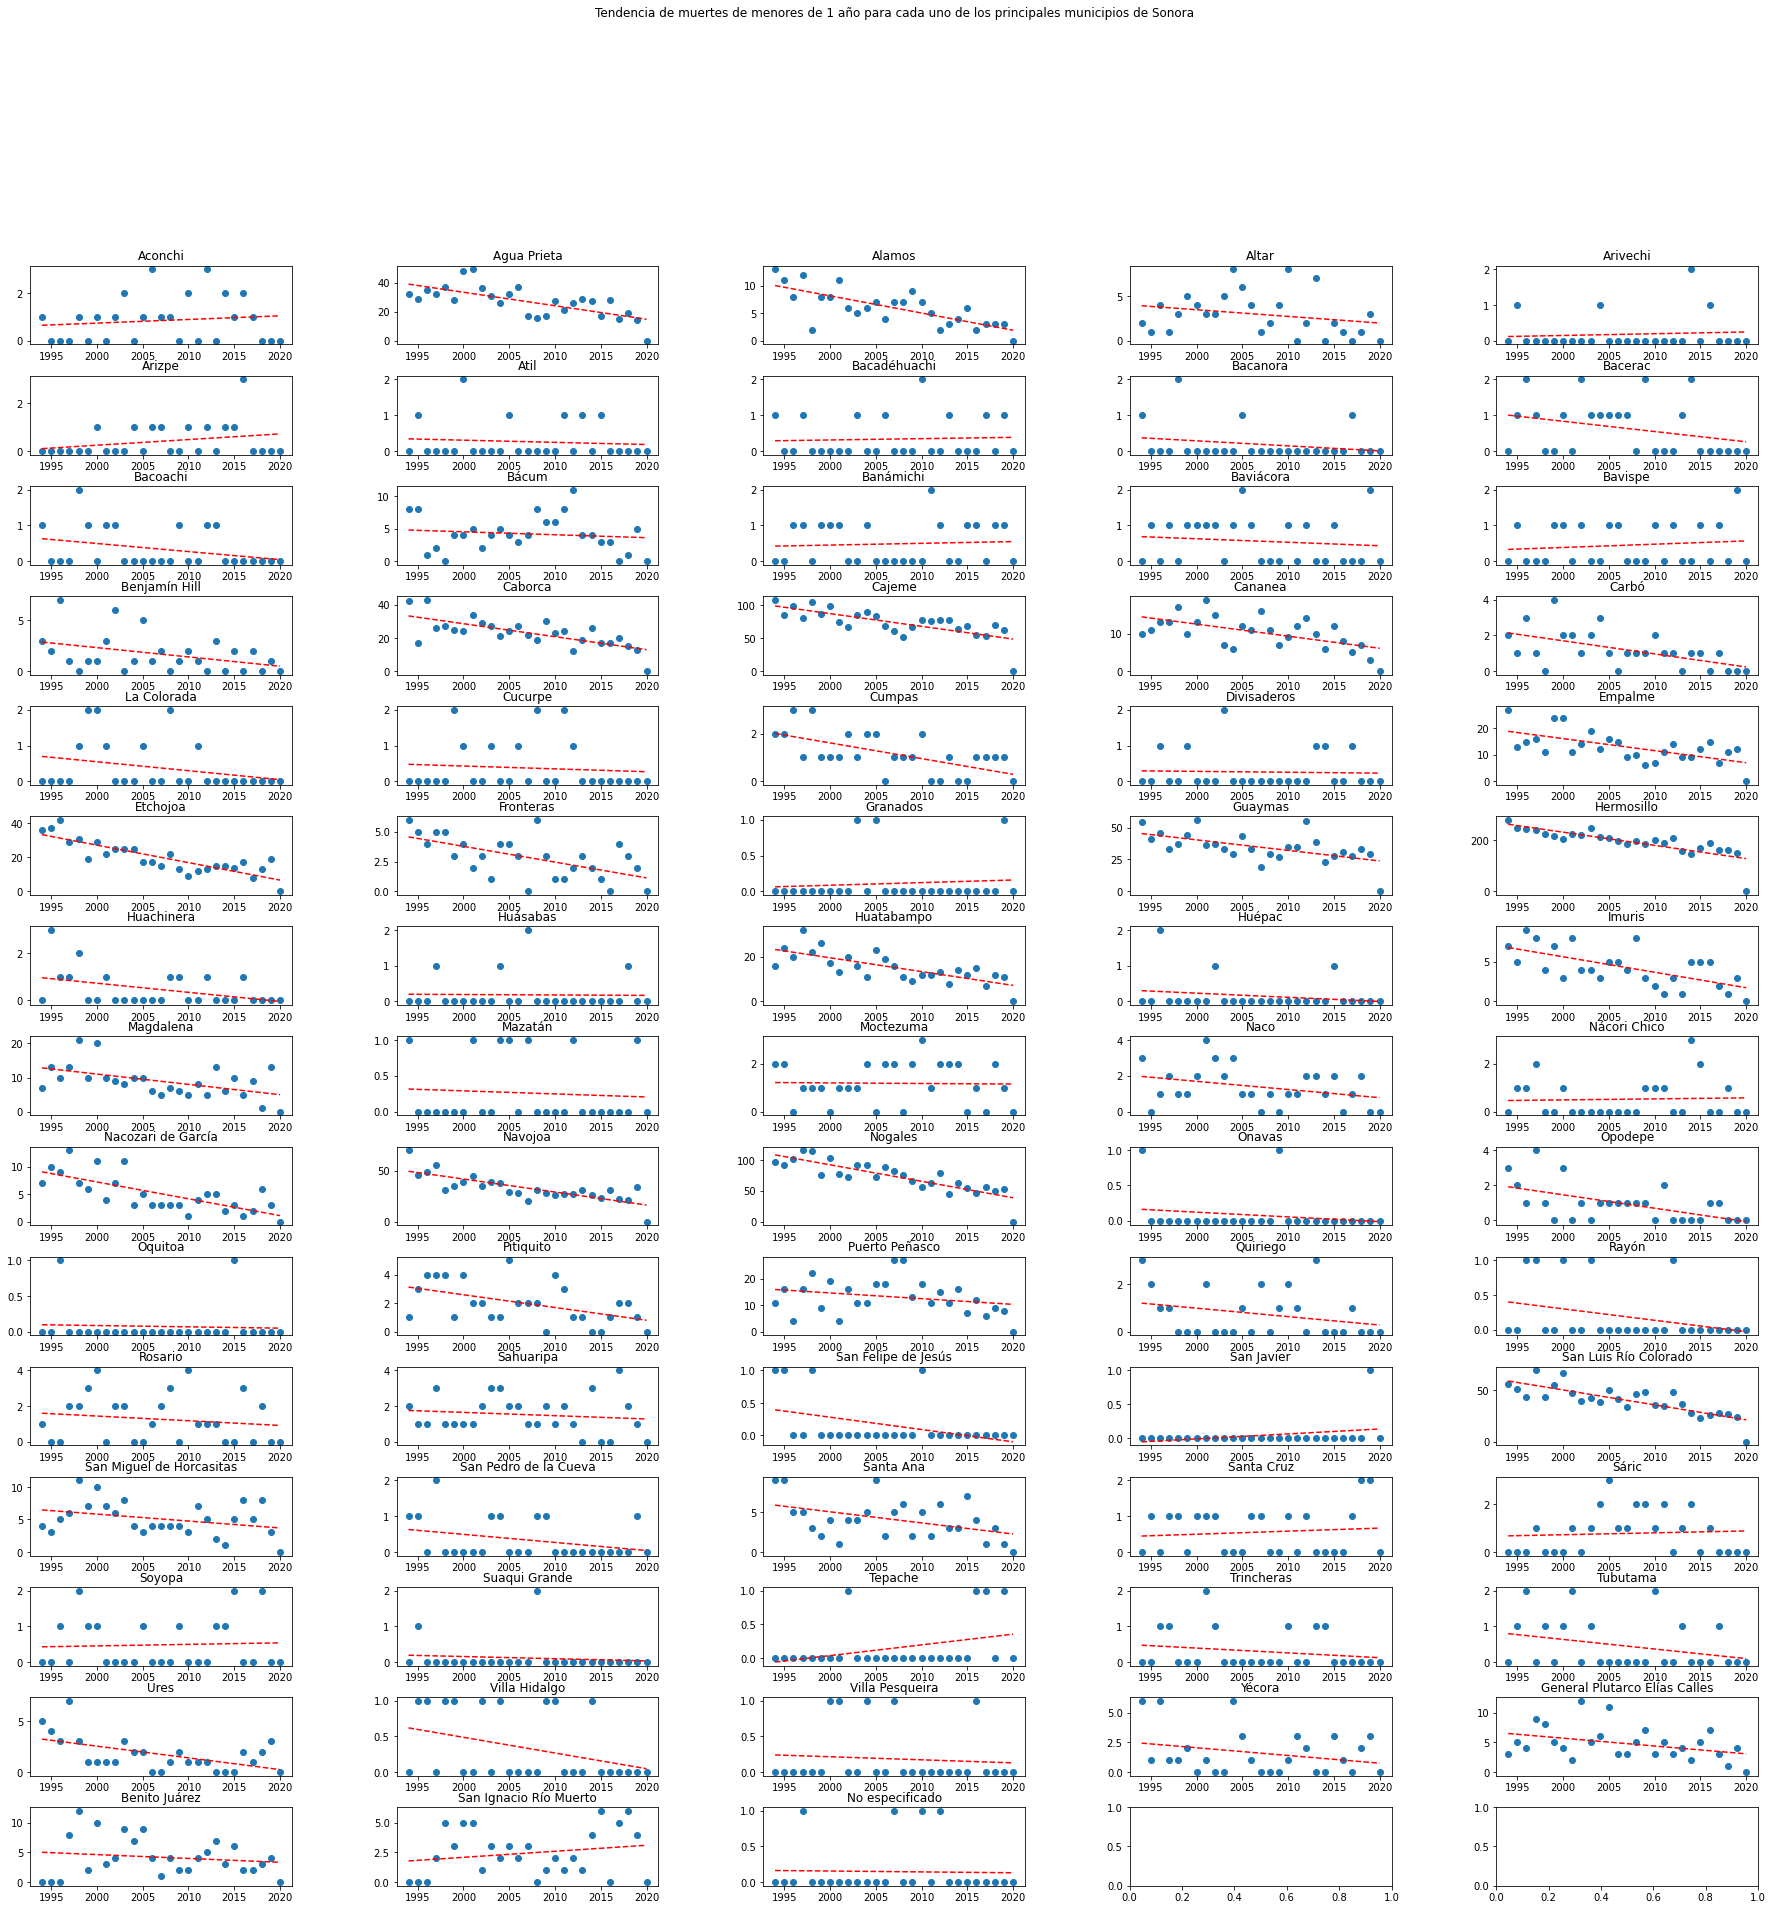

In [20]:

i = 0
fig, ax = plt.subplots(15, 5, figsize=(30,45))

for m in municipos:
    i+=1
    dff = mortalidad_tidy[mortalidad_tidy['municipio'] == m]
    plt.subplot(15, 5, i)
    plt.scatter(dff.año, dff.defuncion)
    z = np.polyfit(dff.año, dff.defuncion, 1)
    p = np.poly1d(z)
    plt.title(m)
    plt.plot(dff.año,p(dff.año),"r--")
    


plt.subplots_adjust(left=0.1,
                    bottom=0.4, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Tendencia de muertes de menores de 1 año para cada uno de los principales municipios de Sonora')
plt.show()

In [40]:
mortalidad_tidy.head()

,municipio,año,defuncion
0,Aconchi,1994,1.0
1,Agua Prieta,1994,32.0
2,Alamos,1994,13.0
3,Altar,1994,2.0
4,Arivechi,1994,0.0


In [47]:
mortalidad_tidy

,municipio,año,defuncion
0,Aconchi,1994,1.0
1,Agua Prieta,1994,32.0
2,Alamos,1994,13.0
3,Altar,1994,2.0
4,Arivechi,1994,0.0
...,...,...,...
1966,Yécora,2020,0.0
1967,General Plutarco Elías Calles,2020,0.0
1968,Benito Juárez,2020,0.0
1969,San Ignacio Río Muerto,2020,0.0


In [50]:
mortalidad_tidy['municipio'].replace('é','e')

0                             Aconchi
1                         Agua Prieta
2                              Alamos
3                               Altar
4                            Arivechi
                    ...              
1966                           Yécora
1967    General Plutarco Elías Calles
1968                    Benito Juárez
1969           San Ignacio Río Muerto
1970                  No especificado
Name: municipio, Length: 1971, dtype: object

In [58]:
import unidecode
def simplify(text):
	import unicodedata
	try:
		text = unicode(text, 'utf-8')
	except NameError:
		pass
	text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
	return str(text)

In [61]:
mortalidad_tidy['municipio'] = mortalidad_tidy['municipio'].apply(simplify)

In [62]:
mortalidad_tidy

,municipio,año,defuncion
0,Aconchi,1994,1.0
1,Agua Prieta,1994,32.0
2,Alamos,1994,13.0
3,Altar,1994,2.0
4,Arivechi,1994,0.0
...,...,...,...
1966,Yecora,2020,0.0
1967,General Plutarco Elias Calles,2020,0.0
1968,Benito Juarez,2020,0.0
1969,San Ignacio Rio Muerto,2020,0.0
